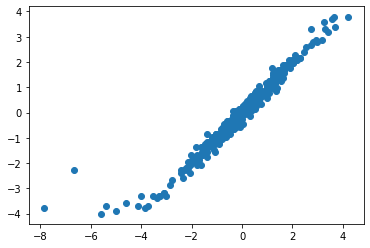

In [2]:
import math
import random
import numpy as np
from scipy.stats import t
from scipy.integrate import quad
import matplotlib.pyplot as plt

def multivariate_t_dist_pdf(x,cov,v):
    cov_matrix = np.array(cov, dtype='float')
    x_matrix = np.array(x, dtype='float')
    
    d = len(x_matrix)
    
    first_term = 1 / math.sqrt(np.linalg.det(cov_matrix))
    second_term = 1 / math.sqrt((v*math.pi)**d)
    third_term = math.gamma((v+d)/2) / math.gamma(v/2)
    fourth_term = (1+np.matmul(np.matmul(x_matrix,np.linalg.inv(cov_matrix)),(x_matrix).transpose())/v)**(-(v+d)/2)
        
    return(first_term*second_term*third_term*fourth_term)

def multivariate_t_dist_cdf(x1,x2,c,df):
    def quadFunc(x):
        return multivariate_t_dist_pdf([x1,x],c,df)
    res, error = quad(quadFunc,-4,x2)
    return res

def mvt_t_cdf_inverse(x_1,a,co,dof_f):
    x_2 = np.linspace(-4,4,80)
    new = -4
    small = 1
    for i in x_2:
        dif = a - multivariate_t_dist_cdf(x_1,i,co,dof_f)
        if abs(dif) < small:
            small = abs(dif) 
            new = i     
    return new
    
def mvt_random_sample(n,covariance,d_f):
    x_values = []
    y_values = []
    for i in range(n):
        r1  = random.uniform(0,1)
        x_var_1 = t.ppf(r1,df=d_f)
        a =  multivariate_t_dist_cdf(x_var_1,4,covariance,d_f)
    
        r2 = random.uniform(0,a)
        x_var_2 = mvt_t_cdf_inverse(x_var_1,r2,covariance,d_f)
    
        x_values.append(x_var_1)
        y_values.append(x_var_2)
    
    plt.scatter(x_values,y_values);

mvt_random_sample(500,[[2,1.99],[1.99,2]],4)